# UN Data Exploration Bonus for NSS Data Science - Abigail Ezell

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv")

In [24]:
gdp_df = (
    gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
)

In [25]:
gdp_df['Country'] = gdp_df['Country'].astype("string")

In [26]:
continents=pd.read_csv("../data/continents.csv")

In [27]:
gdp_df=gdp_df.merge(continents, how='inner', on='Country')

In [29]:
life_expectancy=pd.read_csv("../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv",skiprows=4)

In [30]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name':'Country','variable':'Year','value':'Life_Expectancy'})
)

In [210]:
# I'll convert both 'Year' and 'Country' to string in both dataframes
gdp_df['Year'] = gdp_df['Year'].astype("string")
life_expectancy['Year'] = life_expectancy['Year'].astype("string")
# I'll convert Country to string in life_expectancy
life_expectancy['Country'] = life_expectancy['Country'].astype("string")

In [222]:
# Merge gdp_df and life_expectancy on country and year columns
gdp_le=gdp_df.merge(life_expectancy, on=['Country','Year'], how='inner')
# Merged dataframe was initially coming out as blank; checking to make sure there are no trailing or leading spaces
gdp_df['Country']=gdp_df['Country'].str.strip()
life_expectancy['Country']=life_expectancy['Country'].str.strip()
gdp_df['Year']=gdp_df['Year'].str.strip()
life_expectancy['Year']=life_expectancy['Year'].str.strip()
# Sort by year and country in ascending order
#gdp_le['Year'] = gdp_le['Year'].astype("int64")
gdp_le=gdp_le.sort_values(by=['Country', 'Year'], ascending=[True, True])

In [223]:
print(gdp_le)

          Country  Year  GDP_Per_Capita Continent  Life_Expectancy
23    Afghanistan  2000     1617.826475      Asia           55.005
22    Afghanistan  2001     1454.110782      Asia           55.511
21    Afghanistan  2002     1774.308743      Asia           56.225
20    Afghanistan  2003     1815.928200      Asia           57.171
19    Afghanistan  2004     1776.918207      Asia           57.810
...           ...   ...             ...       ...              ...
5826     Zimbabwe  2019     3294.806084    Africa           61.060
5825     Zimbabwe  2020     2987.269823    Africa           61.530
5824     Zimbabwe  2021     3184.785451    Africa           60.135
5823     Zimbabwe  2022     3323.121932    Africa           62.360
5822     Zimbabwe  2023     3442.251327    Africa           62.775

[5856 rows x 5 columns]


Let's compare the median life expectacy for each across all of the years of data that we have. Perform a groupby on both Year and Continent and then aggregate using the median and save the results to a new object.

a. What type of object results from this? \
b. Look at the index of the resulting object. What do you notice about it? \
c. Use .loc to select the median life expectancy for Asia in 2010. \
d. Use .loc to select the median life expectancy for both Asia and Africa in 2010. \
e. Use .loc to select the values for all continents for the year 2010. \
f. Use .loc to select the median life expectancy for Asia across all years. Hint: One way to do this is to use the swaplevels method.

In [224]:
gdp_le.dtypes

Country                    object
Year               string[python]
GDP_Per_Capita            float64
Continent                  object
Life_Expectancy           float64
dtype: object

In [225]:
gdp_le_med=gdp_le.groupby(['Year','Continent']).Life_Expectancy.agg('median')
gdp_le_med

Year  Continent    
1990  Africa           53.684000
      Asia             65.736500
      Europe           74.370671
      North America    70.471000
      Oceania          65.056000
                         ...    
2023  Asia             74.537000
      Europe           80.541463
      North America    74.333500
      Oceania          68.292500
      South America    77.392000
Name: Life_Expectancy, Length: 204, dtype: float64

In [226]:
type(gdp_le_med)

pandas.core.series.Series

In [227]:
gdp_le_med.index

MultiIndex([('1990',        'Africa'),
            ('1990',          'Asia'),
            ('1990',        'Europe'),
            ('1990', 'North America'),
            ('1990',       'Oceania'),
            ('1990', 'South America'),
            ('1991',        'Africa'),
            ('1991',          'Asia'),
            ('1991',        'Europe'),
            ('1991', 'North America'),
            ...
            ('2022',        'Europe'),
            ('2022', 'North America'),
            ('2022',       'Oceania'),
            ('2022', 'South America'),
            ('2023',        'Africa'),
            ('2023',          'Asia'),
            ('2023',        'Europe'),
            ('2023', 'North America'),
            ('2023',       'Oceania'),
            ('2023', 'South America')],
           names=['Year', 'Continent'], length=204)

*The resulting index is a hierarchical index. The columns we grouped by ended up as the indices of the resulting series.*

In [228]:
#median life expectancy for Asia in 2010
print(gdp_le_med.loc[('2010','Asia')])

71.569


In [229]:
#median life expectancy for both Asia and Africa in 2010
gdp_le_med.loc[('2010',['Asia','Africa'])]

Year  Continent
2010  Asia         71.5690
      Africa       58.6365
Name: Life_Expectancy, dtype: float64

In [230]:
#select the values for all continents for the year 2010
gdp_le_med.loc['2010']

Continent
Africa           58.636500
Asia             71.569000
Europe           79.063415
North America    72.403500
Oceania          68.347000
South America    73.779000
Name: Life_Expectancy, dtype: float64

In [231]:
#select the median life expectancy for Asia across all years. Hint: One way to do this is to use the swaplevels method
gdp_le_med_swapped = gdp_le_med.swaplevel('Year', 'Continent')
gdp_le_med_swapped.loc['Asia']

Year
1990    65.736500
1991    67.040110
1992    66.727720
1993    66.426841
1994    66.197000
1995    66.962000
1996    67.734000
1997    68.517000
1998    69.303000
1999    70.157000
2000    69.428268
2001    69.228659
2002    69.518049
2003    69.611549
2004    68.227329
2005    70.213500
2006    70.001500
2007    70.306500
2008    70.619500
2009    69.907500
2010    71.569000
2011    71.850000
2012    72.066500
2013    72.429500
2014    72.098000
2015    73.300500
2016    73.733000
2017    74.106000
2018    74.374500
2019    74.734500
2020    73.625500
2021    73.049000
2022    74.778000
2023    74.537000
Name: Life_Expectancy, dtype: float64

Group gdp_le by both Year and Continent and find the min, median, and max values for both gdp per capita and life expectancy. Hint: You may want to use the agg method. \
a. Look at the columns of the resulting object. What do you notice? \
b. Select the median gdp per capita value for Asia in 2010.

In [232]:
gdp_le_agg=gdp_le.groupby(['Year','Continent']).agg({'GDP_Per_Capita': ['min', 'median','max'], 'Life_Expectancy': ['min','median','max']})
gdp_le_agg

GDP_Per_Capita                               \
                              min        median            max   
Year Continent                                                   
1990 Africa            547.622781   2431.892671   23884.810700   
     Asia              775.328254   7113.819734  108057.042464   
     Europe           2411.112898  26110.299835   80947.492013   
     North America    3946.365646  10957.760919   79109.890650   
     Oceania          2213.539539   3990.926713   36182.384132   
...                           ...           ...            ...   
2023 Asia             1992.424394  15056.373386  127543.554752   
     Europe          13642.676957  43585.119424  130373.477942   
     North America    2956.462137  22480.975259   98041.688721   
     Oceania          2534.027563   6545.520915   60408.943368   
     South America    9843.970142  19018.239070   49315.160311   

                   Life_Expectancy                        
                               min     median        max  
Year Continent                                            
1990 Africa                 37.644  53.684000  69.404878  
     Asia                   45.185  65.736500  78.837073  
     Europe                 62.750  74.370671  78.961000  
     North America          53.215  70.471000  77.436585  
     Oceania                59.102  65.056000  76.994634  
...                            ...        ...        ...  
2023 Asia                   65.170  74.537000  85.247317  
     Europe                 71.198  80.541463  84.056098  
     North America          64.936  74.333500  82.309000  
     Oceania                62.109  68.292500  83.051220  
     South America          68.581  77.392000  81.167000  

[204 rows x 6 columns]

In [233]:
gdp_le_agg.columns

MultiIndex([( 'GDP_Per_Capita',    'min'),
            ( 'GDP_Per_Capita', 'median'),
            ( 'GDP_Per_Capita',    'max'),
            ('Life_Expectancy',    'min'),
            ('Life_Expectancy', 'median'),
            ('Life_Expectancy',    'max')],
           )

*The columns of the resulting object are multi-indexed.*

In [234]:
print(gdp_le_agg.loc[('2010','Asia'),('GDP_Per_Capita','median')])

10126.545111007494


In this question, we'll see how the median gdp per capita has changed over time. Start by creating a Series, gdp_median_per_year by grouping by the Year variable and calculating the median gdp per capita. \
a. Convert gdp_median_per_year to a DataFrame by using the reset_index method. \
b. The shift method will allow you to compare values across rows. Use this method to create a new column showing the change in gdp per capita since the prior year. \
c. How many times was there a drop in median gdp per capita from one year to the next?

In [235]:
gdp_median_per_year=gdp_le.groupby('Year')['GDP_Per_Capita'].median()

In [236]:
gdp_median_per_year=gdp_median_per_year.reset_index()

In [237]:
gdp_median_per_year['Change_in_GDP']= gdp_median_per_year['GDP_Per_Capita'] - gdp_median_per_year['GDP_Per_Capita'].shift(1)

In [238]:
gdp_median_per_year

,Year,GDP_Per_Capita,Change_in_GDP
0,1990,8907.111220,NaN
1,1991,9084.996632,177.885413
2,1992,9081.540512,-3.456121
3,1993,9337.957201,256.416689
4,1994,8865.072704,-472.884497
5,1995,8936.778146,71.705443
6,1996,9306.982537,370.204390
7,1997,9727.281887,420.299350
8,1998,9884.916623,157.634736
9,1999,10435.398681,550.482058


In [239]:
gdp_drop=len(gdp_median_per_year[gdp_median_per_year['Change_in_GDP']<0])
print(f'Between 1990 and 2023, GDP dropped from one year to the next {gdp_drop} times.')

Between 1990 and 2023, GDP dropped from one year to the next 7 times.


Now, let's expand on the prior question to find the change in GDP from year to year for each country. \
a. Add a new column to the gdp_le DataFrame showing the change in gdp per capita from the prior year for that country. Hint: You can combine groupby with the shift method.\
b. Which country had the largest one year increase in gdp per capita? Which had the largest one year drop in gdp per capita?

In [242]:
gdp_le['GDP_Change']= gdp_le['GDP_Per_Capita'] - gdp_le.groupby('Country')['GDP_Per_Capita'].shift(1) 
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,GDP_Change
23,Afghanistan,2000,1617.826475,Asia,55.005,NaN
22,Afghanistan,2001,1454.110782,Asia,55.511,-163.715693
21,Afghanistan,2002,1774.308743,Asia,56.225,320.197961
20,Afghanistan,2003,1815.928200,Asia,57.171,41.619457
19,Afghanistan,2004,1776.918207,Asia,57.810,-39.009993
...,...,...,...,...,...,...
5826,Zimbabwe,2019,3294.806084,Africa,61.060,-278.177506
5825,Zimbabwe,2020,2987.269823,Africa,61.530,-307.536261
5824,Zimbabwe,2021,3184.785451,Africa,60.135,197.515628
5823,Zimbabwe,2022,3323.121932,Africa,62.360,138.336480


In [243]:
# Alternative
# gdp_le['GDP_Change']=gdp_le.groupby('Country')['GDP_Per_Capita'].diff(periods=-1)

In [244]:
biggest_drop_row=gdp_le.loc[gdp_le['GDP_Change'].idxmin()]
biggest_drop_country=biggest_drop_row['Country']
biggest_drop=biggest_drop_row['GDP_Change'].round(2)*-1
biggest_drop_year=biggest_drop_row['Year']
print(f'The largest one year drop in gdp per capita was {biggest_drop} in {biggest_drop_year} in {biggest_drop_country}.')

The largest one year drop in gdp per capita was 73757.76 in 2020 in Macao SAR, China.


In [174]:
biggest_gain_row=gdp_le.loc[gdp_le['GDP_Change'].idxmax()]
biggest_gain_country=biggest_gain_row['Country']
biggest_gain=biggest_gain_row['GDP_Change'].round(2)
biggest_gain_year=biggest_gain_row['Year']
print(f'The largest one year gain in gdp per capita was {biggest_gain} in {biggest_gain_year} in {biggest_gain_country}.')

The largest one year gain in gdp per capita was 44871.8 in 2023 in Macao SAR, China.


When looking at time series data, there can often be a large amount of observation to observation variability, making it more difficult to see general trends. This variability can be smoothed out by calculating rolling averages. We'll see how in this question.\
a. First, filter gdp_le down to just the rows for the United States and save the result to a DataFrame named gdp_le_us.\
b. Use rolling to calculate the 3-year moving average of gdp per capita for the US.\
c. Plot both the original gdp per capita values and the rolling average on the same plot.

In [271]:
gdp_le_us=gdp_le.loc[gdp_le['Country']=='United States'][['Year','GDP_Per_Capita']].set_index('Year')

In [272]:
us_rolling_mean=gdp_le_us['GDP_Per_Capita'].rolling(3).mean()

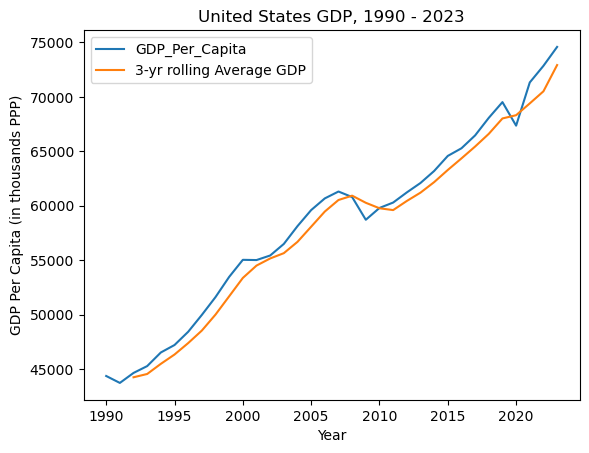

In [275]:
ax=gdp_le_us.plot(kind='line',label='Regular GDP')
us_rolling_mean.plot(kind='line', label='3-yr rolling Average GDP', ax=ax)
plt.title('United States GDP, 1990 - 2023')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (in thousands PPP)')
ax.legend()
plt.show()

When working with large datasets, it can sometimes pay off to be mindful of what data types you are using for each variable.\
a. Create a new column, Continent_Category by converting the Continent column to a category.\
b. Use the memory_usage method to compare the memory used by the original Continent column compared to the category version.\
c. You can also sometimes get speedups for groupby operations by using category datatypes. In Jupyter, if you want to estimate how long it takes to run a block of code, you can add the %%timeit magic to the top of a cell. Compare doing a groupby + aggregation on the original Continent column compared to the Continent_Category column.\
d. You can also sometimes save memory usage by adjusting the size that is stored for integer values. By default, the int64 type is used which can store values between –9223372036854775808 and 9223372036854775807. However, for the Year variable, we really don't need that large of a range. We could get by with a 16 bit integer, whose range is -32768 to 32768. Convert the Year column to int16 type and then compare the memory usage.\
e. Finally, you don't have to make these datatype changes after the data has been read in. Add some parameters to the read_csv call that imports the GDP data. Read in only the needed columns (not the Value Footnotes column). Also, read in the Country or Area column as a category type and the Year column as an int16 type.

In [293]:
gdp_le['Continent_Category']=gdp_le['Continent'].astype('category')

In [294]:
gdp_le['Continent'].memory_usage()

225832

In [295]:
gdp_le['Continent_Category'].memory_usage()

185060

In [291]:
%%timeit magic
gdp_le['Continent'].value_counts()

125 μs ± 2.95 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [292]:
%%timeit magic
gdp_le['Continent_Category'].value_counts()

71.2 μs ± 410 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [305]:
gdp_le['Year_int16']=gdp_le['Year'].astype('int16')

In [306]:
gdp_le['Year'].memory_usage()

225832

In [307]:
gdp_le['Year_int16'].memory_usage()

190696

In [310]:
#Add some parameters to the read_csv call that imports the GDP data. Read in only the needed columns (not the Value Footnotes column). 
#Also, read in the Country or Area column as a category type and the Year column as an int16 type.
gdp_df=pd.read_csv("../data/gdp_per_capita.csv", usecols=["Country or Area", "Year","Value"],dtype={'Country or Area': 'category', 'Year': 'int16'})

In [311]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247
